In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loan_df = pd.read_csv('/Users/dharasheth/Downloads/Loan_Default.csv')

In [3]:
loan_df["income"] = loan_df["income"].fillna(loan_df["income"].mean())
loan_df["loan_amount"] = loan_df["loan_amount"].fillna(loan_df["loan_amount"].mean())
loan_df["rate_of_interest"] = loan_df["rate_of_interest"].fillna(loan_df["rate_of_interest"].mean())
loan_df["approv_in_adv"] = loan_df["approv_in_adv"].fillna(loan_df["approv_in_adv"].mode())



loan_df = loan_df.assign(
total_units = loan_df["total_units"].map({
"1U": "1U",
"2U": "2U+",
"3U": "2U+",
"4U": "2U+"}),
loan_amt_v_income = loan_df["loan_amount"]/loan_df["income"]
)

loan_df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1,loan_amt_v_income
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0,66.954023
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN,41.465863
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0,42.879747
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0,38.425926
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0,66.714559


In [4]:
prep_loan_df = loan_df.drop([
 "year", 
 "ID", 
 "open_credit", 
 "construction_type", 
 "Security_Type", 
 "Secured_by"], 
 axis=1
 )
prep_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 145326 non-null  object 
 1   Gender                     148670 non-null  object 
 2   approv_in_adv              147762 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148536 non-null  object 
 5   Credit_Worthiness          148670 non-null  object 
 6   business_or_commercial     148670 non-null  object 
 7   loan_amount                148670 non-null  int64  
 8   rate_of_interest           148670 non-null  float64
 9   Interest_rate_spread       112031 non-null  float64
 10  Upfront_charges            109028 non-null  float64
 11  term                       148629 non-null  float64
 12  Neg_ammortization          148549 non-null  object 
 13  interest_only              14

In [10]:
from sklearn.model_selection import train_test_split

features = [
"loan_amount", 
"income", 
"Gender",
"rate_of_interest",
"age",
"lump_sum_payment",
"credit_type",
"total_units",
"Credit_Worthiness",
"Credit_Score",
"approv_in_adv", 

]

X = pd.get_dummies(prep_loan_df[features], drop_first=True)
y = prep_loan_df["Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=12345)
from sklearn.linear_model import LogisticRegression

In [11]:
from sklearn.linear_model import LogisticRegression 

In [14]:
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8525929911885384

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lr.predict(X_test))

0.8525929911885384

In [32]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
accuracy_score(y_test, lr.predict(X_test))

0.8525929911885384

In [16]:
confusion_matrix(y_test, lr.predict(X_test))

array([[22214,   131],
       [ 4252,  3137]])

In [17]:
precision_score(y_test, lr.predict(X_test))

0.9599143206854345

In [18]:
recall_score(y_test, lr.predict(X_test))

0.42455000676681554

In [36]:
f1 = f1_score(y_test, lr.predict(X_test))
f1

0.5887210284320165

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
std = StandardScaler()

X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

In [26]:
#tuneing it
logreg = LogisticRegression(C=.6, penalty="l1", solver="saga", max_iter=1000)
lr_reg = logreg.fit(X_train_std, y_train)

print(f"Train Accuracy:{lr_reg.score(X_train_std, y_train)}")
print(f"Test Accuracy:{lr_reg.score(X_test_std, y_test)}")

Train Accuracy:0.8607654536893792
Test Accuracy:0.86211071500639


In [27]:
confusion_matrix(y_test, lr_reg.predict(X_test_std))

array([[22207,   138],
       [ 3962,  3427]])

In [28]:
precision_score(y_test, lr_reg.predict(X_test_std))

0.9612903225806452

In [29]:
recall_score(y_test, lr_reg.predict(X_test_std))

0.46379753687914466

In [38]:
f1 = f1_score(y_test, lr_reg.predict(X_test_std))
f1

0.6257075041080884

In [45]:
lr_reg.predict_proba(X_test_std)[:,1] > .25

array([False, False, False, ..., False, False,  True])

In [58]:
confusion_matrix(y_test,lr_reg.predict_proba(X_test_std)[:,1] > .1)

array([[ 3507, 18838],
       [  329,  7060]])

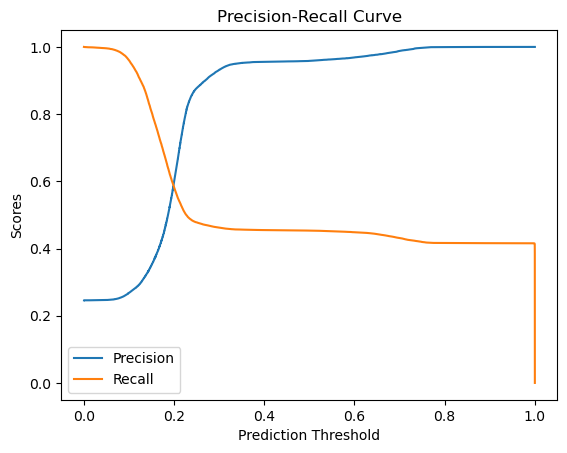

In [79]:
from sklearn.metrics import precision_recall_curve 
import matplotlib.pyplot as plt

p_curve, r_curve, t_curve = precision_recall_curve(y_train, lr_reg.predict_proba(X_train_std)[:,1])

plt.plot(t_curve, p_curve[:-1], label='Precision')
plt.plot(t_curve, r_curve[:-1], label='Recall')
plt.xlabel('Prediction Threshold')
plt.ylabel('Scores')
plt.legend()
plt.title('Precision-Recall Curve')
plt.show()

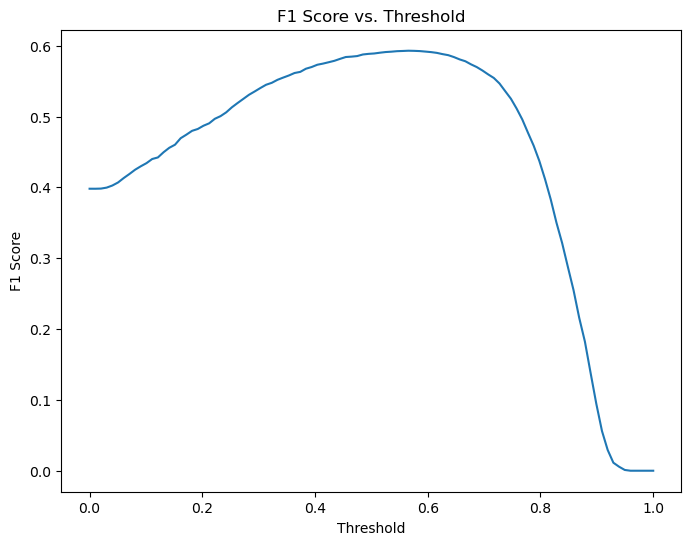

In [78]:
y_probs = lr.predict_proba(X_test) [:,1]
thresholds = np.linspace(0, 1, 100)
f1_scores = [f1_score(y_test, (y_probs >= threshold)) for threshold in thresholds]

plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores)
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold')
plt.show()

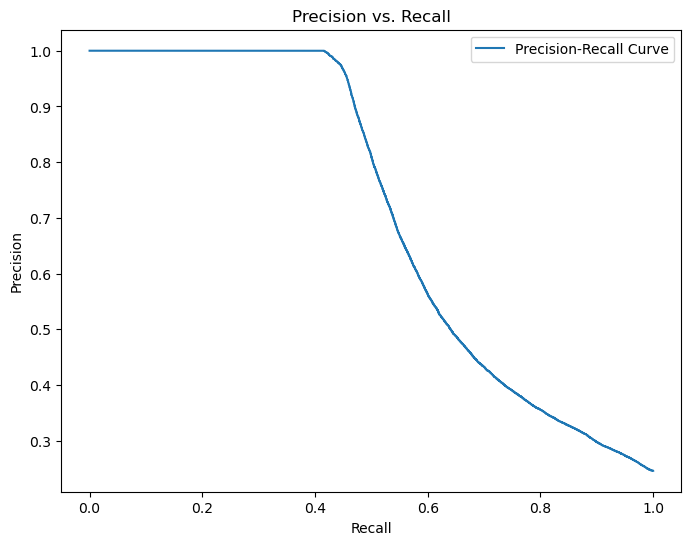

In [97]:
# Precision vs Recall 

#y_probs = lr.predict_proba(X_train_std) [:,1]
# thresholds = np.linspace(0, 1, 200)
# f1_scores = [f1_score(y_train, (y_probs >= threshold)) for threshold in thresholds]
p_curve, r_curve, t_curve = precision_recall_curve(y_train, lr_reg.predict_proba(X_train_std)[:,1])

plt.figure(figsize=(8, 6))
plt.plot(r_curve, p_curve, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs. Recall')
plt.legend()
plt.show()